# Julia Intro

Julia is a high level language that allows you to quickly develop a mathematic model that solves your science problem of interest. The syntax is intuitive to understand and it allows Greek alphabet letters, subscript and superscript to make coding with scientific formulas more pleasant than ever.

Read the code below and give it a go.

mycos(0.2π, 0.05π) = 0.7071067811865476
(typeof(y₀), typeof(y₁)) = (Vector{Float64}, Vector{Float64})
(maximum(y₁ - y₀), eps(Float64)) = (5.828670879282072e-16, 2.220446049250313e-16)


┌ Info: Saved animation to 
│   fn = /home/900/yxs900/tmp.gif
└ @ Plots /opt/julia/packages/Plots/Xv2qA/src/animation.jl:114


Plots.AnimatedGif("/home/900/yxs900/tmp.gif")
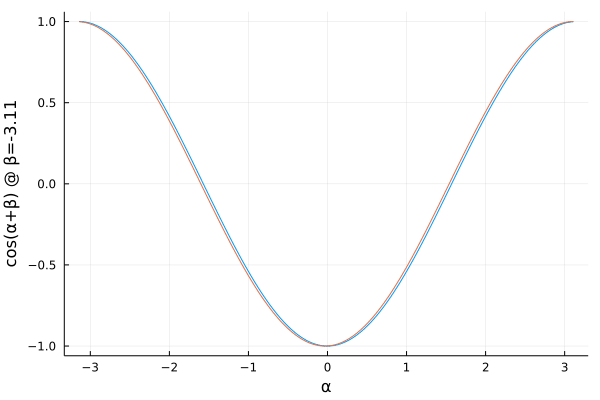

In [1]:
mycos(α,β)=cos(α)cos(β)-sin(α)sin(β)
@show mycos(.2π,.05π)
α = -π:0.01π:π
β = copy(α)
a = repeat(α,inner=length(β))
b = repeat(β,outer=length(α))
y₀ = cos.(a + b)
y₁ = mycos.(a, b)
@show typeof(y₀),typeof(y₁)
@show maximum(y₁-y₀), eps(Float64)
using Plots
plot(α,y₁[1:length(β):end],xlabel="α",legend=false)
anim = @animate for idx in 2:length(β)
    bi = round(b[idx];digits=2)
    plot!(α,y₁[idx:length(β):end],ylabel="cos(α+β) @ β=$bi")
end
gif(anim,fps=30)

This is a short piece of code to learn the sum formula for Cosine. The function `mycos(α,β)=cos(α)cos(β)-sin(α)sin(β)` gives almost the same numerical result as `cos(α+β)` does - the error is at the same order of magnitude of the accuracy of the type Float64.

While the intuitive syntax makes the code highly readable, there are still some confusing details, such as how the scalar function `mycos()` knows to crunch the vector inputs and what the difference is between the bang plot function `plot!()` and the function `plot()`. Let's put these specific confusions aside for now and learn how to address these questions in general in Julia's REPL.

## REPL


REPL is the abbrievation of read-eval-print loop. Julia's REPL allows quick and easy evaluations of the code. Let's have a look at the help, shell and pkg mode and be equiped with more tools to work with Julia code.  

### Help Mode

To quickly access the documentation of any objects, add `?` in front of the name and it prints out the documentation string for the object with that name. It can find the help info for any objects, no matter if it's a type, a function or a macro. 

Read the help info of `BigInt`,`<:`,`+`,`names()`,`fieldnames(ComplexF64)`,`@which` and `@less`, following the example for `Float64` as shown below.

In [2]:
?Float64

search: Float64 Float16 Float32 float floatmin floatmax Cfloat BigFloat



```
Float64(x [, mode::RoundingMode])
```

Create a `Float64` from `x`. If `x` is not exactly representable then `mode` determines how `x` is rounded.

# Examples

```jldoctest
julia> Float64(pi, RoundDown)
3.141592653589793

julia> Float64(pi, RoundUp)
3.1415926535897936
```

See [`RoundingMode`](@ref) for available rounding modes.

---

```
Float64 <: AbstractFloat
```

64-bit floating point number type (IEEE 754 standard).

Binary format: 1 sign, 11 exponent, 52 fraction bits.


### Shell Mode

To execute a system command, add `;` in front of the command. 

In [3]:
;pwd

/home/900/yxs900


Note that modifications made by the executed shell commands in the shell mode don't apply to the shell environment in which Julia is running as it starts a new process to run the issued command.

### Pkg Mode

This is the interface for Julia's package manager Pkg. With a leading `]` it runs the subsequent Pkg command to manage the packages in the first environment found in the path(s) defined in DEPOT_PATH. 

For example, `st` is the Pkg command to print out the status of packages in the current environment. In our case, the default environment is found in `/opt/julia`. 

In [41]:
DEPOT_PATH

1-element Vector{String}:
 "/opt/julia"

In [65]:
]st Plots BenchmarkTools

      Status `/opt/julia/environments/v1.7/Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.1
  [91a5bcdd] Plots v1.25.5


Julia's package manager also provides an API interface in the REPL Julia mode. To show the status of the current environment, load the Pkg module before running the status command. Here are [more commands](https://docs.julialang.org/en/v1/stdlib/Pkg/) for you to try . 

In [66]:
using Pkg
Pkg.status(["Plots","BenchmarkTools"])

      Status `/opt/julia/environments/v1.7/Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.1
  [91a5bcdd] Plots v1.25.5


To query all the packages status in the current environment, run the status command without any argument. 

* `] st`
* `using Pkg; Pkg.status()`

### REPL Exercises

Before proceeding to the next section, here are some optional help info you may want to read through to have a deeper understanding of how Julia uses modules. Start with looking at the help info for `Main`, `using`,and `import` and use the functions you tried in the [Help Mode](#Help-Mode) section to explore a module of your interest, such as `Base`, and see where it takes you. 

In [ ]:
?Main

In [ ]:
@show names(Base)[1:10:end];

In [ ]:
?complex()

In [ ]:
c = complex(7.0)

In [ ]:
@less complex(7.0)

## Variables and Types

Here are some notes for the most freuqently used types in scientific computing. 

### Tuples

Tuples in Julia are immutable. The size of the tuple variable is fixed. No modifications can be made, neither the length nor the element of it. 

In [49]:
λ=3
atuple = ("Ben",'A',λ)
@show typeof(atuple)
atuple[1]

typeof(atuple) = Tuple{String, Char, Int64}


"Ben"

#### Things to Try 
 0. Run `atuple[0]`.
 1. Run `atuple[1]="Alice"`.
 2. Type in `β₁`. Hint: `\beta` follow by \[Tab\] and then continue with `\_1`+\[Tab\]
 3. Read the help info returned by `?Char` and `?String`. 

### Vectors

Unlike tuples, vectors are mutable. Both their length and their elements can be modified. 

In [50]:
@time avector = ["Ben",'A',λ]
@time push!(avector,1+im)
@time avector[1]="Alice"
@show avector
@show typeof(avector)

  0.041642 seconds (46.91 k allocations: 2.710 MiB, 99.78% compilation time)
  0.000003 seconds (1 allocation: 80 bytes)
  0.000003 seconds
avector = Any["Alice", 'A', 3, 1 + 1im]
typeof(avector) = Vector{Any}


Vector{Any} (alias for Array{Any, 1})

#### Things to Try

1. Run `bvector = [1.0,2.0,3.0]` and then change the first element to `"Ben"`.
2. Run `cvector = [λ,2.0,3.0]` and compare the tpye of `cvector[1]` and `λ`.

### Matrices

Matrix{T} is just an alias to Array{T,2} which is the type for two-dimentional arrays with elements of type T. In the following example, T is Float64. It is possible to create a matrix with elements of different types in which case T is Any.

When slicing a matrix, one can create a **view** to save memory for subsequent operations by allowing modifications to the original matrix.  
Julia uses the column-major convention and therefore code runs faster when applying operations by columns instead of rows.

In [51]:
amatrix = Matrix{Float64}(randn(100,100))
@show eltype(amatrix)
@show typejoin(Matrix,Vector)
rr = @view(amatrix[1:5,1:5])
rr[1,1]=3.0
pp = amatrix[96:end,96:end]
pp[1,1]=4.1
@show amatrix[1,1],amatrix[96,96];
@time [ amatrix[ii,:] for ii in 1:100 ];
@time [ amatrix[:,jj] for jj in 1:100 ];

eltype(amatrix) = Float64
typejoin(Matrix, Vector) = Array
(amatrix[1, 1], amatrix[96, 96]) = (3.0, -0.7745536687316008)
  0.077025 seconds (127.20 k allocations: 6.952 MiB, 99.49% compilation time)
  0.061361 seconds (95.57 k allocations: 5.167 MiB, 99.55% compilation time)


#### Things to Try

1. Create a matrix filled with undef and explore operations that you can apply to its elements and slicings.
2. Compare time comsumption of the same operation apply to matrices slicing creted with and without **@view**.
3. Compare time comsumption of the same operation apply to matrices by **rows** and by **columns**.


### Arrays

This is the type for N-dimentional arrays. 

Even though Julia arrays can be multi-dimentional, their elements are stored in memory in an ordered linear sequence and indexing therefore can be reduced to one-dimentional. To save time in memory fetching, always keep the dimension whose neighbouring elements distance equals to one in the inner loop. 

In [52]:
anarray = Array{Float64}(undef, 4,3,1)
@show anarray
@show length(anarray)
@show anarray[12]=1.0
@show anarray[4,3,1]
@show strides(anarray);
barray = similar(anarray)
@time fill!(barray,3.0)
stride(anarray,2)

anarray = [1.10477982324915e-310 1.10477982325547e-310 1.1048138229165e-310; 1.10477982325073e-310 1.10477982325705e-310 1.1048138229165e-310; 1.1047798232523e-310 1.10477982325863e-310 1.1048138229165e-310; 1.1047798232539e-310 1.1047798232602e-310 1.1047798232681e-310;;;]
length(anarray) = 12
anarray[12] = 1.0 = 1.0
anarray[4, 3, 1] = 1.0
strides(anarray) = (1, 4, 12)
  0.008307 seconds (5.75 k allocations: 317.812 KiB, 99.62% compilation time)


4

#### Things to Try

1. Construct a 5D array with both `Float64` and `Int64` elements.
1. Learn to use the functions `strides()` and `stride()`, then convert the indexing of the 5D array from the Cartesian form to the linear form based on their output.
1. Create an array with the same shape but different element type than that of `anarray`.
1. Understand the difference between function `fill()` and `fill!()` and compare it with the difference between `plot()` and `plot!()`.

## Functions

Julia functions are objects that map a tuple of argument values to a return value. They get compiled to efficient native code via LLVM at their first call.


The basic syntax to define a function is shown in the following example. The declaration of type for input argument(s) and return value allows fast dispatch when calling the function. 

In [53]:
function Fruits(apples::Int64, oranges::Int64=2, peaches::Int64=2)::String
    return "There are $apples apples, $oranges oranges, and $peaches peaches"
end

function Fruits(apples::Float64, oranges::Float64=2.0, peaches::Float64=1.5)::String
    return "There are $apples kg apples, $oranges kg oranges, and $peaches kg peaches"
end

display(Fruits(4))
display(Fruits(3.0))
Fruits

"There are 4 apples, 2 oranges, and 2 peaches"

"There are 3.0 kg apples, 2.0 kg oranges, and 1.5 kg peaches"

Fruits (generic function with 6 methods)

For short functions, it is easier to use the inline definition and it also allows the type declarations for input argument(s) and the return value. 

See below for an example of the declaration of the return type as the function definition converts the return value to the specified type.

In [54]:
Σ(x::Int64,y)::Int64 = x + y
@show typeof(1+2.0), typeof(Σ(1,2.0));
@code_warntype Σ(1,2.0)

(typeof(1 + 2.0), typeof(Σ(1, 2.0))) = (Float64, Int64)
MethodInstance for Σ(::Int64, ::Float64)
  from Σ(x::Int64, y) in Main at In[54]:1
Arguments
  #self#::Core.Const(Σ)
  x::Int64
  y::Float64
Body::Int64
1 ─ %1 = Main.Int64::Core.Const(Int64)
│   %2 = (x + y)::Float64
│   %3 = Base.convert(%1, %2)::Int64
│   %4 = Core.typeassert(%3, %1)::Int64
└──      return %4



Sometimes it is necessary to define functions that take an arbitrary number of arguments.

In [55]:
Σ(input...)::Int64 = sum(input)
@show Σ(1,2,3,4);

Σ(1, 2, 3, 4) = 10


Sometimes it is necesary to define recursive functions.

In [56]:
fib(n::Integer) = n ≤ 2 ? one(n) : fib(n-1) + fib(n-2)
fib(4)

3

and Sometimes it is convenient to define anonymous functions and pass it to `map()` in place.

In [57]:
map(x -> x^2 + 2x - 1, [1, 3, -1])

3-element Vector{Int64}:
  2
 14
 -2

### Things to Try

1. Define a recursive sort function.
1. Find out which method `Σ(1.0,2)` calls. 